In [1]:
from julia.api import Julia
import matplotlib.pyplot as plt

jl = Julia(compiled_modules=False)
jl.eval('include("qr_test.jl")')

[{'index': 1,
  'back_error': 5.472935384192138e-16,
  'cond_A': 999999.9999921658},
 {'index': 2,
  'back_error': 5.045761858609541e-16,
  'cond_A': 999981210865.8713},
 {'index': 3,
  'back_error': 5.424119629840114e-16,
  'cond_A': 2.3816464393474512e+17},
 {'index': 4,
  'back_error': 7.730364906046255e-16,
  'cond_A': 6.786922543592878e+17}]

cond_A (Library): [999.9999999999746, 1000000.0000096423, 999999990.8628212, 1000003465133.8882, 996141604295239.8]
Backward Error (Library): [5.203266995567063e-16, 5.021076681531746e-16, 5.825455125509716e-16, 7.294718525429274e-16, 7.574230503716403e-16]


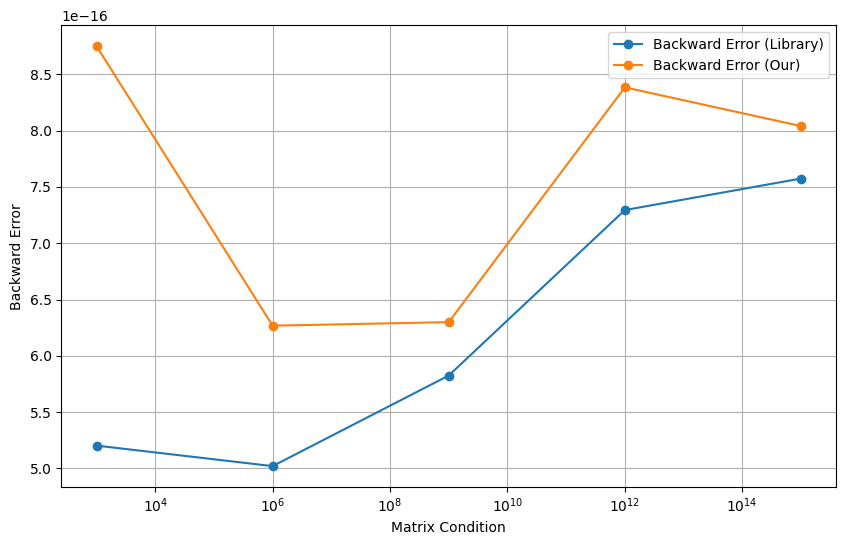

In [10]:
jl.eval('include("qr_test.jl")')
# Esegui entrambi i test
results_lib = jl.eval('qr_test_lib()')
results_our = jl.eval('qr_test_our()')

# stampa tutti i valori di cond_A
print('cond_A (Library):', [entry['cond_A'] for entry in results_lib])

# stampa back_error
print('Backward Error (Library):', [entry['back_error'] for entry in results_lib])


# Estrai i dati per entrambi
cond_A_lib = [entry['cond_A'] for entry in results_lib]
back_error_lib = [entry['back_error'] for entry in results_lib]
cond_A_our = [entry['cond_A'] for entry in results_our]
back_error_our = [entry['back_error'] for entry in results_our]

# Plotting combinato
plt.figure(figsize=(10, 6))
plt.plot(cond_A_lib, back_error_lib, label='Backward Error (Library)', marker='o')
plt.plot(cond_A_our, back_error_our, label='Backward Error (Our)', marker='o')
plt.xlabel('Matrix Condition')
plt.ylabel('Backward Error')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()
